<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [26]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [27]:
path_to_file='C:/Users/chris/Desktop/ECON-628-01-ckbamona/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
df= pd.read_csv(path_to_file)


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [8]:
# Print the first 3 rows:
df.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [5]:
# Print the last 3 rows:
df.tail(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270952,10/20/2015,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,$15.07,$22.61,6,$135.66,4.5,1.19
270953,11/20/2015,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,$26.05,$39.08,6,$234.48,10.5,2.77
270954,01/27/2015,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,$2.75,$4.13,8,$33.04,1.6,0.42


In [8]:
## How many rows and columns does the dataset has
df.shape

(270955, 18)

In [9]:
#I want to see the variable types
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [11]:
#Some summary statistics
#Transposing the table makes it easier to visualize my summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,NaN,NaN,NaN,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,NaN,NaN,NaN,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


In [11]:
#Wgat are the name of all the columns
df.columns.values

array(['Date', 'Store Number', 'City', 'Zip Code', 'County Number',
       'County', 'Category', 'Category Name', 'Vendor Number',
       'Item Number', 'Item Description', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'], dtype=object)


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

# Identifying columns that we need to convert and clean

In [194]:
#Let's look at the variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [45]:
# Print out the last 3 rows and visualize the data 
df.tail(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons)
270952,2015-10-20,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,26826,Jack Daniels Old #7 Black Lbl,750,15.07,22.61,6,135.66,1.19
270953,2015-11-20,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,65258,Jagermeister Liqueur,1750,26.05,39.08,6,234.48,2.77
270954,2015-01-27,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,37993,Smirnoff Vodka 80 Prf,200,2.75,4.13,8,33.04,0.42


# Findings after visualizing the data and identifying the variable types

In [ ]:
#The variable type for "Date" is an "object": we need to reformat the date from "object" to "datetime"
#"Bootle cost" and "Sale (Dollars)" are "object": we need to convert the variable type to "float"
#"Bootle cost", "Sale (Dollars)", and "Bootle retail" have a $ sign: we need to remove it

### 3.2 Clean the columns

In [28]:
#Removing the"$" sign for the State Bottle Cost, State Bottle Retail, and Sale (Dollars) columns
df["State Bottle Retail"] = df["State Bottle Retail"].str.replace('$','')
df["State Bottle Cost"] = df["State Bottle Cost"].str.replace('$','')
df["Sale (Dollars)"] = df["Sale (Dollars)"].str.replace('$','')

#http://stackoverflow.com/questions/9797446/how-to-remove-certain-characters-from-a-variable-python

In [14]:
# Print out the last 3 rows and see if the "$" sign is still there
df.tail(2)

,Date,Store Number,City,Zip Code,County,Category,Category Name,Item Number,Item Description,Bottle Volume (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270953,11/20/2015,3562,WEST BURLINGTON,52655,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,65258,Jagermeister Liqueur,1.75,26.05,39.08,6,234.48,10.5,2.77
270954,01/27/2015,4446,URBANDALE,50322,Polk,1031080.0,VODKA 80 PROOF,37993,Smirnoff Vodka 80 Prf,0.20,2.75,4.13,8,33.04,1.6,0.42


In [29]:
#The textual representation of a number differs distinctly from a numeric variable 
#on which programs can perform mathematical operations
#Let's convert the variables we have previously identified, from text (object) to numbers (float)

df["State Bottle Cost"] = df["State Bottle Cost"].astype(float)

df["State Bottle Retail"] = df["State Bottle Retail"].astype(float)

df["Sale (Dollars)"] = df["Sale (Dollars)"].astype(float)

#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html

In [30]:
# Reformat the date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y", errors='ignore')
##http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

In [234]:
#Let's now look at all the variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetim

In [31]:
# The output above suggests that I have null values for County Number, County, Category, and Category Name
#Let's use a code that generates a boolean mask indicating missing values
df.isnull().any()

#http://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame

Date                     False
Store Number             False
City                     False
Zip Code                 False
County Number             True
County                    True
Category                  True
Category Name             True
Vendor Number            False
Item Number              False
Item Description         False
Bottle Volume (ml)       False
State Bottle Cost        False
State Bottle Retail      False
Bottles Sold             False
Sale (Dollars)           False
Volume Sold (Liters)     False
Volume Sold (Gallons)    False
dtype: bool

In [32]:
#We can even see how many values are missing in each column
df.isnull().sum()
#http://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [33]:
#Something intriguing is that "Category" has 68 missing values but "Category Name" has 632 missing values!!
#It may be the case that certain category name were not properly matched with the category number 
#We can fix that by using the transform(first) code that returns an object that is indexed the same as the one being grouped
#The command below will make sure that the item description matches the same category name accross the dataset 
df['Category Name']=df.groupby('Item Number')['Category Name'].transform('first')
df.isnull().sum()

#http://stackoverflow.com/questions/40732475/how-to-divide-pandas-datafrmes-value-by-its-first-row-by-each-group

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name              57
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [34]:
#Then, let's make sure that each category name and category number match accross the dataset 
df['Category']=df.groupby('Category Name')['Category'].transform('first')
df.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   57
Category Name              57
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [35]:
#Identify and Drop rows with duplicates values
#The command below returns a pandas Series
df.duplicated()
#Then the next code removes duplicate records and returns a DataFrame without duplicates.
df.drop_duplicates()

#https://chrisalbon.com/python/pandas_delete_duplicates.html

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


In [36]:
#Drop missing values 
df.dropna(inplace=True)

#http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [37]:
#Now let's check if the variables were properly cleaned and converted
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 269821 entries, 0 to 270954
Data columns (total 18 columns):
Date                     269821 non-null datetime64[ns]
Store Number             269821 non-null int64
City                     269821 non-null object
Zip Code                 269821 non-null object
County Number            269821 non-null float64
County                   269821 non-null object
Category                 269821 non-null float64
Category Name            269821 non-null object
Vendor Number            269821 non-null int64
Item Number              269821 non-null int64
Item Description         269821 non-null object
Bottle Volume (ml)       269821 non-null int64
State Bottle Cost        269821 non-null float64
State Bottle Retail      269821 non-null float64
Bottles Sold             269821 non-null int64
Sale (Dollars)           269821 non-null float64
Volume Sold (Liters)     269821 non-null float64
Volume Sold (Gallons)    269821 non-null float64
dtypes: datetim

In [38]:
#Number of missing values
df.isnull().sum()

Date                     0
Store Number             0
City                     0
Zip Code                 0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

# Useless Categories


In [39]:
#The Vendor Number is not essential for our analysis.
df.drop(['Vendor Number',], axis=1, inplace=True)

# Unit of measurement

In [40]:
#To ensure consistency, let's convert the measurement unit from miliLiters to Liters for "Bottle Volume (ml)"
#1 milimiter=0.001 liter
df['Bottle Volume (ml)'] = df['Bottle Volume (ml)'] * 0.001

#Rename the column "Bottle Volume (ml)": "Bottle Volume (Liters)"
df = df.rename(columns={'Bottle Volume (ml)': 'Bottle Volume (Liters)'})

# Redundant information

In [41]:
#The volume of liquors sold in Liters and Gallons provide the same information.
#While we may want to drop "Volume Sold (Gallons)", we are going to keep it to investigate which
#Iowa counties are making the most profit on liquor per gallon in 2015
#However, we can drop "County number" and keep the name of the county 
df.drop(['County Number',], axis=1, inplace=True)

# Visualizing data and Identifying outliers

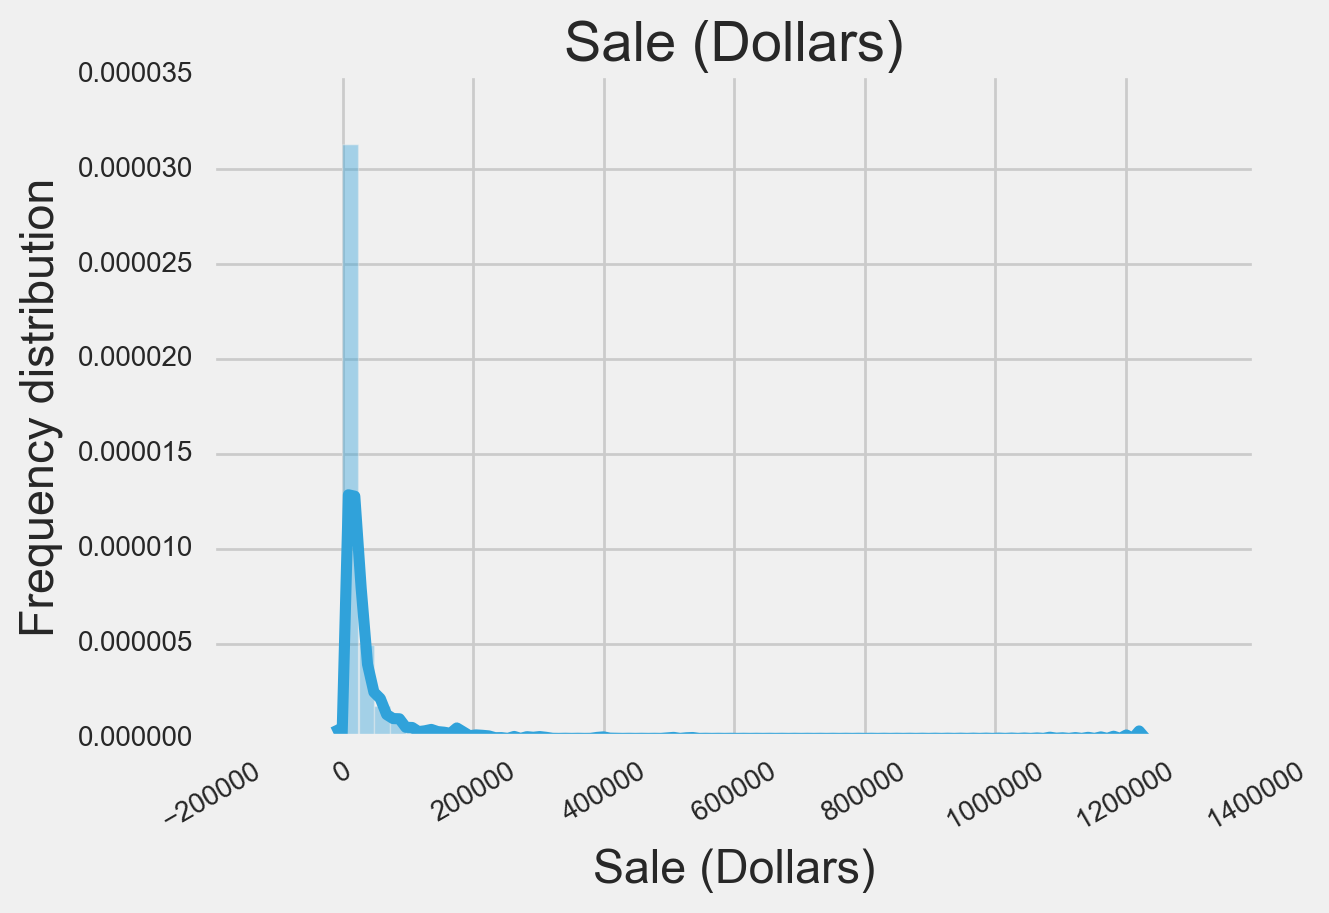

In [42]:
#Histogram displaying frequencies of the total sales generated 
histogram= ['Sale (Dollars)']
for i in histogram:
    sns.distplot(df.groupby('Store Number')[i].sum());
    plt.title(i);
    plt.xlabel(i);
    plt.ylabel('Frequency distribution');
    plt.xticks(rotation=30);
    plt.show();
    print
    


In [ ]:
#An eyeball examination of the histogram indicates potential outliers
#A box-plot should provide some information that the histogram does not provide explicitly: 
#median, 25th and 75th percentile, min/max



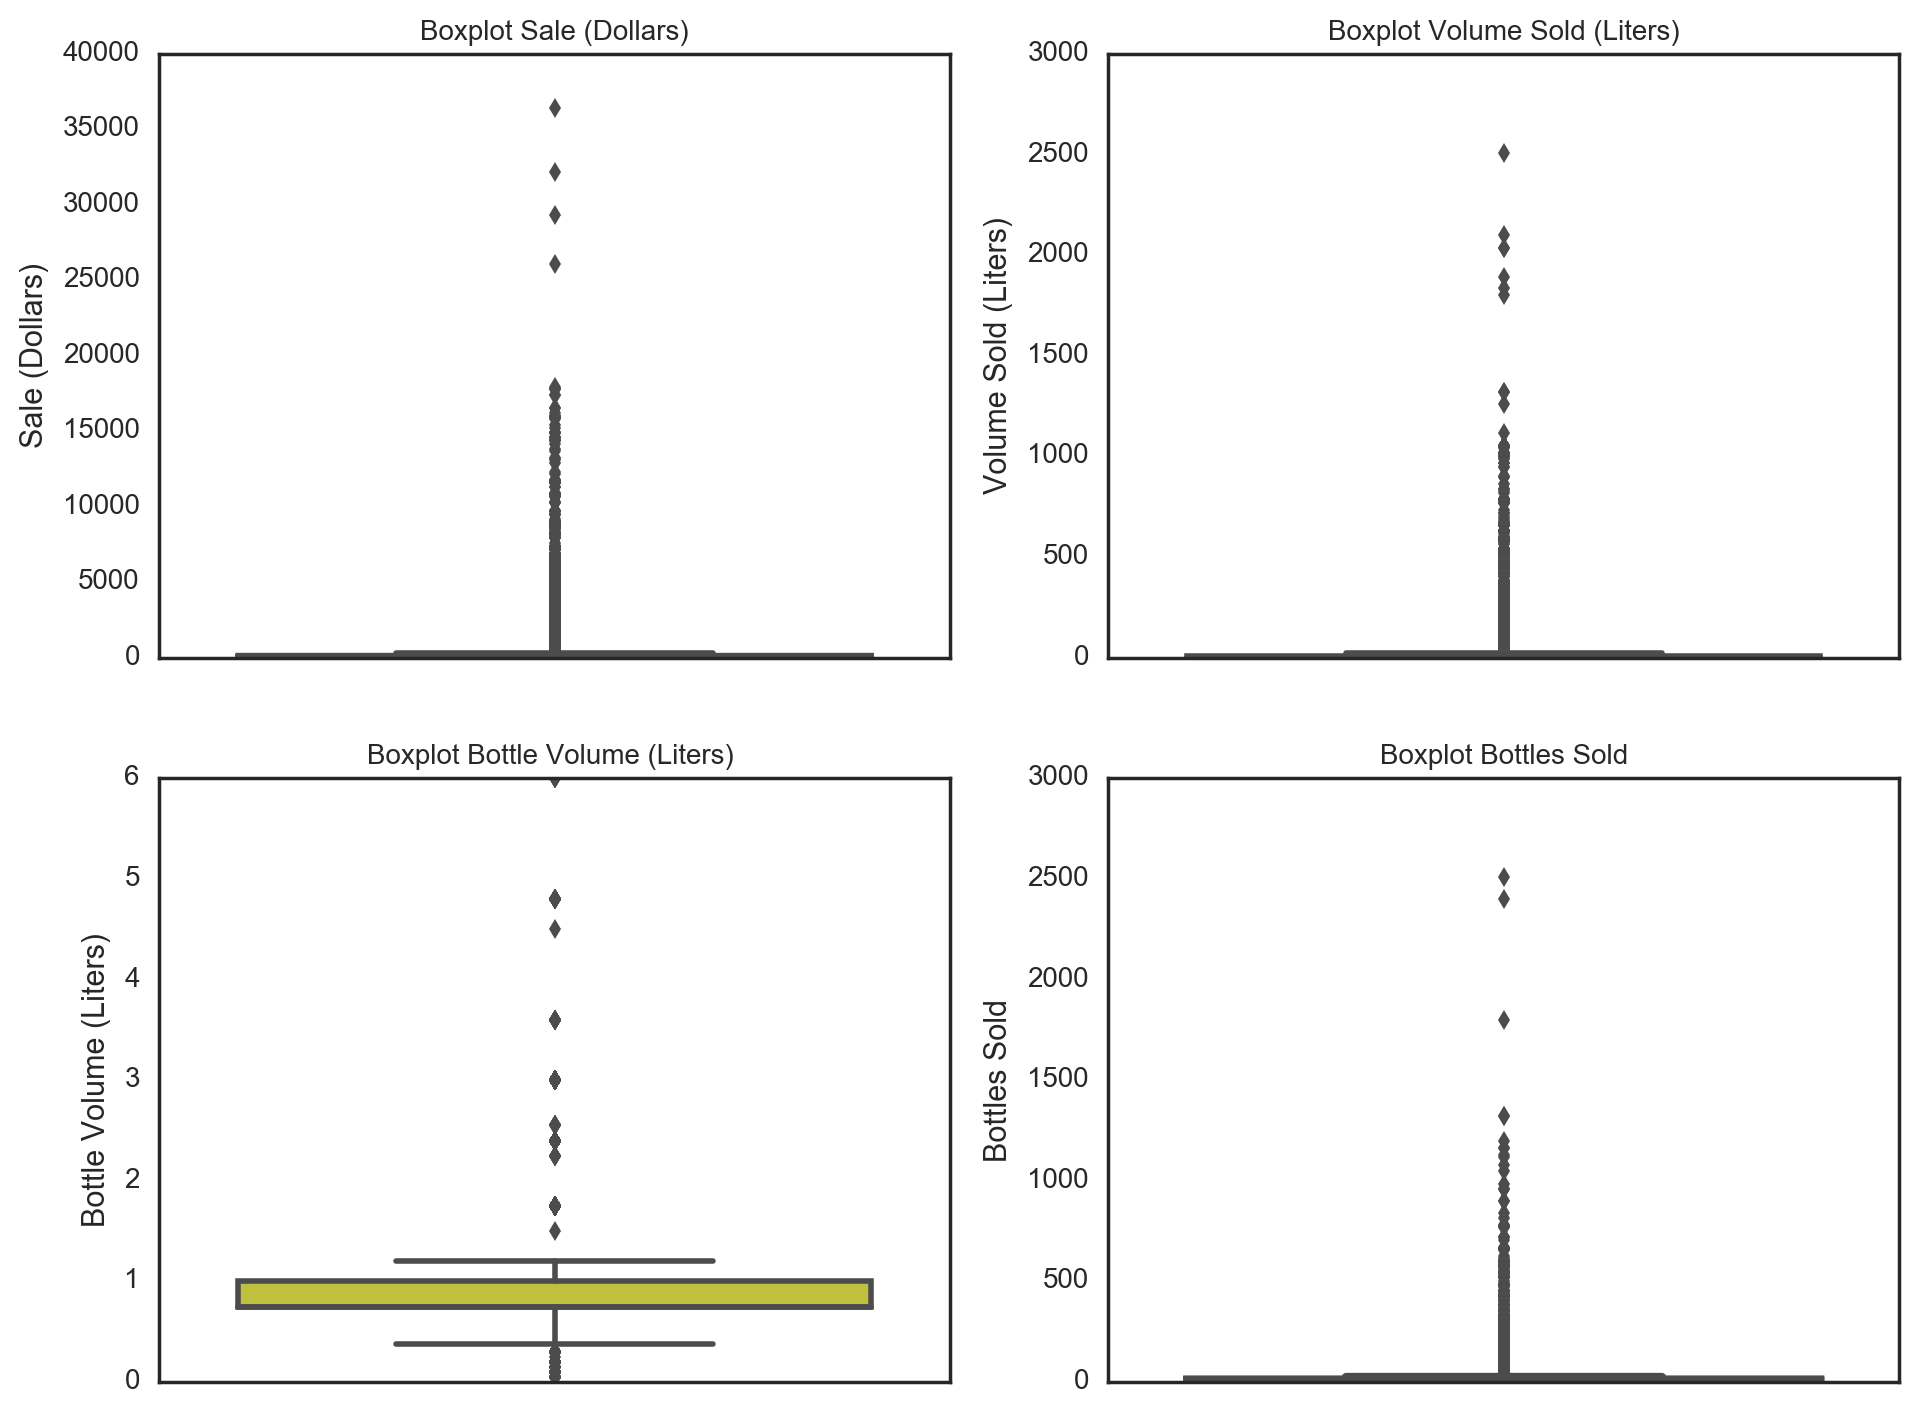

In [250]:
#Let's identify data points that are considered outliers using a box plot
sns.set(rc={"figure.figsize": (8, 6)})
sns.set_style('white')
    
fig, axarr = plt.subplots(2, 2, figsize=(10,8),
                         sharex=False, sharey=False)
axarr[0,0] = sns.boxplot(df['Sale (Dollars)'], orient='v',
             linewidth=2, notch=True, 
            saturation=0.5, ax=axarr[0,0], color="yellow")
axarr[0,0].set_title('Boxplot Sale (Dollars)', fontsize=10)
    
axarr[0,1] = sns.boxplot(df['Volume Sold (Liters)'], orient='v',
             linewidth=2, notch=False, 
            saturation=0.5, ax=axarr[0,1], color="yellow")
axarr[0,1].set_title('Boxplot Volume Sold (Liters)', fontsize=10)
    
axarr[1,0] = sns.boxplot(df['Bottle Volume (Liters)'], orient='v',
             linewidth=2, notch=False, 
            saturation=0.5, ax=axarr[1,0], color="yellow")
axarr[1,0].set_title('Boxplot Bottle Volume (Liters) ', fontsize=10)
    
axarr[1,1] = sns.boxplot(df['Bottles Sold'], orient='v',
             linewidth=3, notch=True, 
            saturation=0.5, ax=axarr[1,1], color="yellow")
axarr[1,1].set_title('Boxplot Bottles Sold',  fontsize=10)

In [ ]:
#The boxplot clearly shows the presence of outliers outperforming the other stores

# Dealing with the outliers

In [69]:
#Normalizing all the variables and plotting the boxplots again
#Rather than dropping the outliers, we are going to rescale the variables using a procedure called "standardization" 
df_sales=df['Sale (Dollars)']
df_sales = (df_sales - df_sales.mean()) / df_sales.std()

df_volumesold=df['Volume Sold (Liters)']
df_volumesold = (df_volumesold - df_volumesold.mean()) / df_volumesold.std()

df_bottlevolume=df['Bottle Volume (Liters)']
df_bottlevolume = (df_bottlevolume - df_bottlevolume.mean()) / df_bottlevolume.std()


df_bottlesold=df['Bottles Sold']
df_bottlesold = (df_bottlesold - df_bottlesold.mean()) / df_bottlesold.std()



## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


# 1. Dealing with stores not open for the full 2015 year

# 1.1. Slicing the dataframe into quarters

In [43]:
#Since some stores have opened and closed during the time period 2015-2016, we can adjust the data by
#creating dataframes for each quarter in each year

#1. Let's create a column that indicates the month and year of sales
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

#2.Let's create a dataframe for each quarter in 2015 and 2016
q1_2015 = df[(df.Month > 1) & (df.Month <3) & (df.Year == 2015)] 
q2_2015 = df[(df.Month > 3) & (df.Month <= 6) & (df.Year == 2015)] 
q3_2015 = df[(df.Month > 6) & (df.Month <= 9) & (df.Year == 2015)] 
q4_2015 = df[(df.Month > 9) & (df.Month <= 12) & (df.Year == 2015)] 

q1_2016 = df[(df.Month > 1) & (df.Month <3) & (df.Year == 2016)] 
q2_2016= df[(df.Month > 3) & (df.Month <= 6) & (df.Year == 2016)] 
q3_2016= df[(df.Month > 6) & (df.Month <= 9) & (df.Year == 2016)] 
q4_2016 = df[(df.Month > 9) & (df.Month <= 12) & (df.Year == 2016)] 

#I have adapted a set of commands that are available on a cheat sheet 
#http://www.webpages.uidaho.edu/~stevel/504/Pandas%20DataFrame%20Notes.pdf


In [44]:
#Let's see how the commands performed
q2_2015.head(3)

,Date,Store Number,City,Zip Code,County,Category,Category Name,Item Number,Item Description,Bottle Volume (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month,Day
5,2015-04-20,2569,CEDAR RAPIDS,52402,Linn,1041100.0,AMERICAN DRY GINS,31473,New Amsterdam Gin,1.75,13.32,19.98,6,119.88,10.5,2.77,2015,4,20
7,2015-06-25,3456,CLEAR LAKE,50428,Cerro Gordo,1012100.0,CANADIAN WHISKIES,10628,Canadian Club Whisky,1.75,15.75,23.63,2,47.26,3.5,0.92,2015,6,25
15,2015-06-10,3717,SUMNER,50674,Bremer,1051100.0,APRICOT BRANDIES,54436,Mr. Boston Apricot Brandy,0.75,4.50,6.75,4,27.00,3.0,0.79,2015,6,10


In [45]:
#Total revenue per store in the Q2 (2015)
q2_2015_sales_by_store = q2_2015.groupby('Store Number', as_index = False).agg({'Sale (Dollars)': 'sum'})
q2_2015_sales_by_store.head(3)

,Store Number,Sale (Dollars)
0,2106,31173.46
1,2113,1994.30
2,2130,35038.09


In [46]:
#Let's sort the Sales in descending order
q2_top_stores=q2_2015_sales_by_store.sort_values(by='Sale (Dollars)', ascending=False)
#Let's see the top 5 performing stores in Q2 (2015)
q2_top_stores.head(5)

,Store Number,Sale (Dollars)
124,2633,277634.39
1002,4829,232202.13
187,3420,122752.14
36,2512,113684.82
181,3385,106732.76


In [ ]:
#As you can see, we have created "mini" dataframes for each quarter in 2015 and 2016
#This way, we can analyze and compare the performance of the stores per quarter. 

# 1.2. Computing the Gross Monthly Revenue

In [ ]:
#Another alternative would be to create a column indicating how many months a store was opened each year
#Then, we can take into account the number of months the store was opened to get the average monthly sale for each year:
#average_monthly_sale=(total sales in dollars)/(number of months opened)

In [18]:
#The command below counts the number of unique months a store operated each year
df_months_opened= df.groupby(['Store Number','Year'])['Month'].nunique().reset_index() 
#http://stackoverflow.com/questions/35134507/python-pandas-how-to-group-by-and-count-unique-values-based-on-multiple-columns/35134761

In [19]:
#We want to see how many months 3 stores have operated each year
df_months_opened.tail(6)

,Store Number,Year,Month
2646,9010,2015,8
2647,9010,2016,1
2648,9013,2015,4
2649,9013,2016,2
2650,9018,2015,1
2651,9023,2016,1


In [ ]:
#Store 9010 was opened 8 months in 2015 and only 1 month in 2016.
#Store 9010 was opened 4 months in 2015 and only 2 months in 2016.
#Stores 9018 and 9023 were only opened for 1 month respectively in 2015 and 2016

In [20]:
#The average_monthly_sale is a metric that will allow us to compare stores even though they did not operate the full year
#We can rename the column "Month": "Number of Months" and merge the dataframe with the original dataframe
df_months_opened= df_months_opened.rename(columns={'Month': 'Number of Months'})
#Then merge the two datasets
df_sales_number_of_month = pd.merge(df, df_months_opened, on=['Store Number', 'Year'], how='right')
#Average sales 
df_sales_number_of_month['Average_monthly_sales']=df_sales_number_of_month['Sale (Dollars)'] / df_sales_number_of_month['Number of Months']
#Average sales in 2015
average_sales_in2015 = df_sales_number_of_month[ (df_sales_number_of_month.Year == 2015)] 
#Total average sales in 2015 per store
gross_monthly_revenue_2015 = average_sales_in2015.groupby('Store Number', as_index = False).agg({'Sale (Dollars)': 'sum'})

In [21]:
#Average 
gross_monthly_revenue_2015.head(3)

,Store Number,Sale (Dollars)
0,2106,146326.22
1,2113,9310.22
2,2130,111871.43


In [ ]:
#We can see how much each store has generated on average per month by taking into account the number of months 
#it was opened throughout the year.

# 2.Investigating problematic stores

# 2.1. Using quarterly data

In [259]:
#The 5 stores that performed the worst in the second quarter of 2015 are the following:
q2_top_stores.tail(5)

,Store Number,Sale (Dollars)
1274,5161,50.10
1164,5035,32.40
774,4567,30.39
871,4683,27.26
189,3440,20.00


# 2.2. Using monthly gross revenue

In [260]:
#If we take into account the monthly gross revenue in 2015, the problematic stores are the following
gross_monthly_revenue_2015.tail(5)

,Store Number,Sale (Dollars)
1367,9001,28208.52
1368,9002,37700.52
1369,9010,5757.96
1370,9013,2217.48
1371,9018,6435.00



## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [47]:
#I create a dataframe with data from 2015
year_2015 = df[ (df.Year == 2015)] 
#I need to sort the data by store number and date and then group by store number
df.sort_values(by=["Store Number", "Date"], inplace=True)
yearly_liquor_sales_by_store = year_2015.groupby('Store Number', as_index = False).agg({'Sale (Dollars)': 'sum'})

#The yearly liquor sales for each store in 2012 is given by running "yearly_liquor_sales_by_store"
#Let's just look at the yearly liquor sales for 10 stores in 2015 
yearly_liquor_sales_by_store.head(10)


,Store Number,Sale (Dollars)
0,2106,146326.22
1,2113,9310.22
2,2130,111871.43
3,2152,7721.08
4,2178,24324.18
5,2190,121689.06
6,2191,125093.49
7,2200,22811.55
8,2205,24681.39
9,2228,17462.07


### 5.2 Calculate the profit each store is making in 2015.


In [48]:
#Profit is equal to revenue minus cost
#The revenue by store is the product of State Bottle Retail & Bottles Sold
df['revenue'] = df['State Bottle Retail'] * df['Bottles Sold']


#The cost is the product of State Bottle Cost & Bottles Sold
df['cost'] = df['State Bottle Cost'] * df['Bottles Sold']

#The profit is the difference between revenue and cost
df['profit'] = df['revenue'] - df['cost']

#We are only interested in year 2015
profit_year_2015 = df[ (df.Year == 2015)] 

#The profit each store is making in 2015 can be obtained by running the command below
     ##yearly_profit_by_store = profit_year_2015.groupby('Store Number', as_index = False).agg({'profit': 'sum'})
#We can sort the stores from the highest performing storea to the lowest performing stores 
#And then look at the top 10 performers only
yearly_profit_by_store = profit_year_2015.groupby('Store Number', as_index = False).agg({'profit': 'sum'})
yearly_profit_by_store.sort_values(by='profit', ascending=False)
yearly_profit_by_store.head(10)



,Store Number,profit
0,2106,48838.08
1,2113,3109.04
2,2130,37325.20
3,2152,2587.53
4,2178,8165.70
5,2190,40617.73
6,2191,41744.39
7,2200,7653.47
8,2205,8244.13
9,2228,5844.34


In [ ]:
#The top 5 performers are therefore stores 2106,2113,2130,2152,2178,and 2190.

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [49]:
df.head(2)

,Date,Store Number,City,Zip Code,County,Category,Category Name,Item Number,Item Description,Bottle Volume (Liters),...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month,Day,revenue,cost,profit
22111,2015-01-08,2106,CEDAR FALLS,50613,Black Hawk,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,43127,Bacardi Superior Rum,1.00,...,36,513.0,36.0,9.51,2015,1,8,513.0,342.0,171.0
47659,2015-01-08,2106,CEDAR FALLS,50613,Black Hawk,1022100.0,TEQUILA,88296,Patron Tequila Silver,0.75,...,12,486.0,9.0,2.38,2015,1,8,486.0,324.0,162.0


In [50]:
#Let's focus on 2015
dfi = df[(df.Year == 2015)]
#profit_per gallon in each county
profit_per_county=dfi.groupby(["County"]).sum()["profit"].reset_index()
gallon_per_county=dfi.groupby(['County']).sum()['Volume Sold (Gallons)'].reset_index()
profit_per_gallon= pd.merge(profit_per_county, gallon_per_county, on=['County'], how='right')
profit_per_gallon['ratio_profit_gallon']=profit_per_gallon['profit']/profit_per_gallon['Volume Sold (Gallons)']
profit_per_gallon.sort_values(by=['ratio_profit_gallon'], ascending=False).head(10)

,County,profit,Volume Sold (Gallons),ratio_profit_gallon
24,Dallas,167728.26,7927.89,21.156734
51,Johnson,574231.16,27963.73,20.534856
76,Polk,2138902.28,109368.38,19.556862
81,Scott,682493.25,35238.65,19.367747
50,Jefferson,27896.95,1446.20,19.289829
28,Des Moines,129030.70,6808.22,18.952193
96,Woodbury,334297.05,17825.81,18.753541
91,Washington,48061.68,2569.91,18.701698
10,Buena Vista,58063.35,3113.31,18.650038
63,Marshall,92581.96,4991.56,18.547701


In [ ]:
#Our analysis indicates that Dallas,Johnson, Polk, Linn,Scott, and Jefferson are the Iowa counties
#that made the most profit on liquor per gallon in 2015.

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [51]:
#We need to compute the correlation coefficient between the profit-store size_ratio and store size in 2015

#Again, we just want to look at 2015

df2015 = df[(df.Year == 2015)]

#We need to create a ratio with profit per store and volume sold (gallons) per store

dfprofit=df2015.groupby(['Store Number']).sum()['profit'].reset_index()

dfgallons=df2015.groupby(['Store Number']).sum()['Volume Sold (Gallons)'].reset_index()

#Now let's merge the 2 datasets with the unique identifier "Store Number'

dfratio= pd.merge(dfprofit, dfgallons, on=['Store Number'], how='right')

#Finally we can add a column "profit_gallons_ratio'

dfratio['profit_gallons_ratio']=dfratio['profit']/dfratio['Volume Sold (Gallons)']

#Let's visualize the data

dfratio.head(2)


,Store Number,profit,Volume Sold (Gallons),profit_gallons_ratio
0,2106,48838.08,2571.33,18.993315
1,2113,3109.04,174.29,17.838315


In [50]:
#Compute the correlation coefficient between the  profit to store size and store size
dfratio[['profit_gallons_ratio','Volume Sold (Gallons)']].corr() 

,profit_gallons_ratio,Volume Sold (Gallons)
profit_gallons_ratio,1.000000,0.015839
Volume Sold (Gallons),0.015839,1.000000


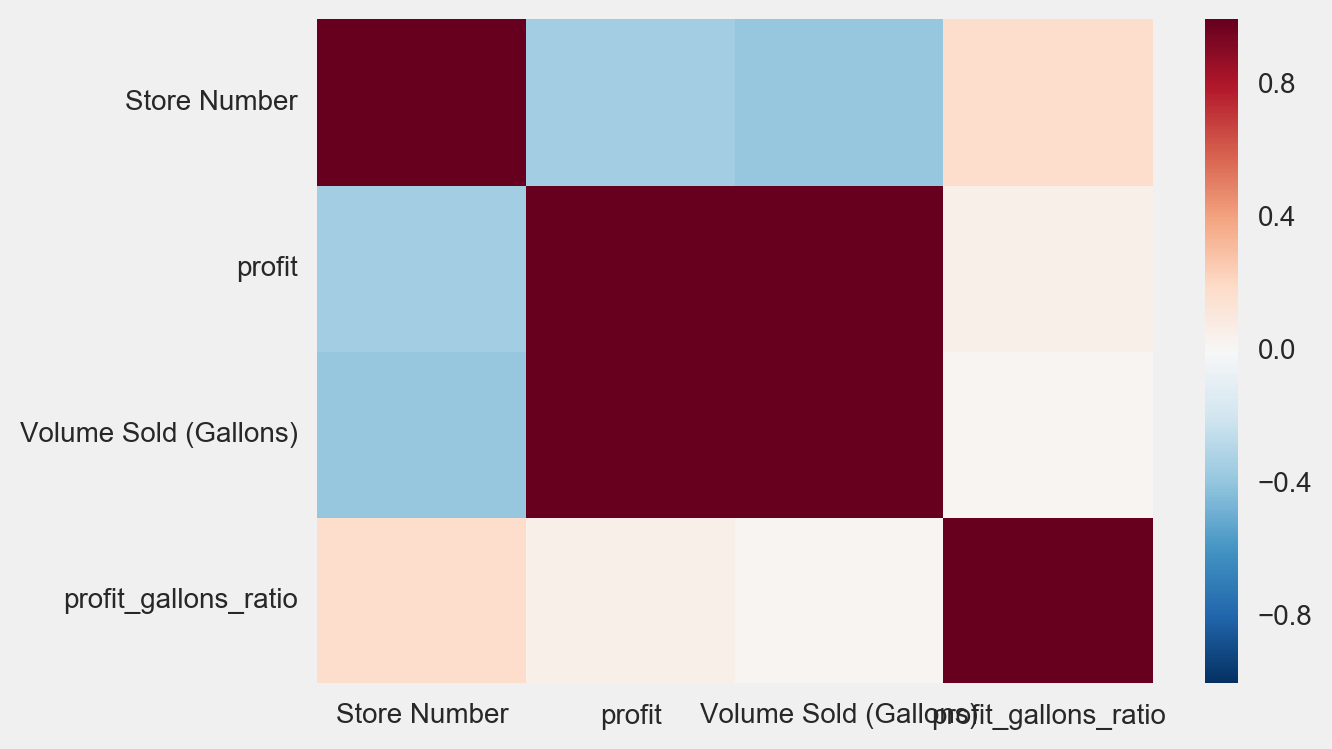

In [51]:
#Visualize the correlation matrix
sns.heatmap(dfratio.corr())

In [ ]:
#The coefficient of correlation is positive but very low (very close to zero).
#While a positive correlation coefficient should indicate that the profit to store size ratio does increase as
#store size increases, the magnitude of the coefficient suggests a very weak and even inexistent relationship between the two
#variables.

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [52]:
#First, let's rename the column "Category Name" 
df = df.rename(columns={'Category Name': 'Liquor'})
#Check if the command worked
df.info()
#Then, let's list all the categories of liquor
df.Liquor.unique()
#https://chrisalbon.com/python/pandas_list_unique_values_in_column.html

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269821 entries, 22111 to 107866
Data columns (total 22 columns):
Date                      269821 non-null datetime64[ns]
Store Number              269821 non-null int64
City                      269821 non-null object
Zip Code                  269821 non-null object
County                    269821 non-null object
Category                  269821 non-null float64
Liquor                    269821 non-null object
Item Number               269821 non-null int64
Item Description          269821 non-null object
Bottle Volume (Liters)    269821 non-null float64
State Bottle Cost         269821 non-null float64
State Bottle Retail       269821 non-null float64
Bottles Sold              269821 non-null int64
Sale (Dollars)            269821 non-null float64
Volume Sold (Liters)      269821 non-null float64
Volume Sold (Gallons)     269821 non-null float64
Year                      269821 non-null int64
Month                     269821 non-null

array(['PUERTO RICO & VIRGIN ISLANDS RUM', 'TEQUILA', 'SPICED RUM',
       'CREAM LIQUEURS', 'IMPORTED VODKA',
       'MISC. AMERICAN CORDIALS & LIQUEURS', 'GRAPE SCHNAPPS',
       'CANADIAN WHISKIES', 'VODKA 80 PROOF',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'AMERICAN DRY GINS',
       'VODKA FLAVORED', 'IRISH WHISKIES', 'TRIPLE SEC',
       'CINNAMON SCHNAPPS', 'FLAVORED RUM', 'IMPORTED SCHNAPPS',
       'AMERICAN GRAPE BRANDIES', 'MISCELLANEOUS SCHNAPPS',
       'COFFEE LIQUEURS', 'AMERICAN AMARETTO', 'PEACH SCHNAPPS',
       'BLENDED WHISKIES', 'SCOTCH WHISKIES', 'IMPORTED VODKA - MISC',
       'STRAIGHT BOURBON WHISKIES', 'STRAWBERRY SCHNAPPS',
       'AMERICAN COCKTAILS', 'JAMAICA RUM', 'SINGLE MALT SCOTCH',
       '100 PROOF VODKA', 'IMPORTED DRY GINS', 'WHISKEY LIQUEUR',
       'DECANTERS & SPECIALTY PACKAGES', 'BUTTERSCOTCH SCHNAPPS',
       'SINGLE BARREL BOURBON WHISKIES', 'STRAIGHT RYE WHISKIES',
       'DISTILLED SPIRITS SPECIALTY', 'WATERMELON SCHNAPPS',
       'TENN

In [53]:
#Now that I know the types of liquors, I can create broader categories

def categories(c):
    if 'PUERTO RICO & VIRGIN ISLANDS RUM' in c or 'SPICED RUM' in c or 'FLAVORED RUM'in c or 'JAMAICA RUM'in c or 'BARBADOS RUM' in c:
        return 'RUM'
    
    elif  'CREAM LIQUEURS'in c or 'MISC. AMERICAN CORDIALS & LIQUEURS'in c or 'MISC. IMPORTED CORDIALS & LIQUEURS'in c or 'COFFEE LIQUEURS' in c or 'WHISKEY LIQUEUR' in c or  'IMPORTED AMARETTO' in c or 'WHITE CREME DE CACAO'in c or 'CREME DE ALMOND' in c or  'WHITE CREME DE MENTHE' in c or 'GREEN CREME DE MENTHE' in c or 'AMARETTO - IMPORTED' in c or 'ANISETTE' in c or 'DARK CREME DE CACAO' in c or 'TRIPLE SEC' in c or 'AMERICAN AMARETTO' in c:
        return 'LIQUEURS'
    
    elif 'IMPORTED VODKA' in c or 'VODKA 80 PROOF' in c or  'VODKA FLAVORED' in c or  'IMPORTED VODKA - MISC' in c or '100 PROOF VODKA' in c or  'LOW PROOF VODKA' in c or 'OTHER PROOF VODKA' in c:
        return 'VODKA'
    
    elif 'AMERICAN GRAPE BRANDIES' in c  or 'IMPORTED GRAPE BRANDIES' in c or  'BLACKBERRY BRANDIES' in c in c or 'APRICOT BRANDIES' in c or 'PEACH BRANDIES' in c  or 'MISCELLANEOUS  BRANDIES' in c:
        return 'BRANDIES'
    
    elif  'CANADIAN WHISKIES' in c or 'IRISH WHISKIES' in c or 'BLENDED WHISKIES' in c or 'SCOTCH WHISKIES' in c or 'STRAIGHT BOURBON WHISKIES'in c or 'SINGLE BARREL BOURBON WHISKIES' in c or 'STRAIGHT RYE WHISKIES' in c or'TENNESSEE WHISKIES' in c or 'JAPANESE WHISKY' in c or 'CORN WHISKIES' in c or 'SINGLE MALT SCOTCH' in c or'SINGLE MALT SCOTCH'in c or 'BOTTLED IN BOND BOURBON':
        return 'WHISKIES'  
    
    elif 'AMERICAN DRY GINS' in c or 'IMPORTED DRY GINS' in c or 'AMERICAN SLOE GINS' in c or  'FLAVORED GINS' in c :
        return 'GINS'
    
    elif 'GRAPE SCHNAPPS' in c or 'CINNAMON SCHNAPPS' in c or 'IMPORTED SCHNAPPS'in c or  'MISCELLANEOUS SCHNAPPS' in c or 'PEACH SCHNAPPS' in c or 'STRAWBERRY SCHNAPPS' in c or  'BUTTERSCOTCH SCHNAPPS' in c or 'WATERMELON SCHNAPPS' in c or 'RASPBERRY SCHNAPPS' in c or 'TROPICAL FRUIT SCHNAPPS' in c or 'APPLE SCHNAPPS' in c or 'PEPPERMINT SCHNAPPS' in c or 'ROOT BEER SCHNAPPS' in c or 'SPEARMINT SCHNAPPS' in c:
        return 'SCHNAPPS'
    
    else:
        return'OTHER ALCOHOL BEVERAGES'
    

    
#http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.DataFrame.apply.html
#Please note that you need to get rid of missing values "Nan" in order to run this command
    
df['broader_categories'] = df['Liquor'].apply(categories)  

#Visualizing a portion of the dataset
df.head(2)

#https://github.com/AnnaDanielle/iowa_liquor_sales/blob/master/.ipynb_checkpoints/Project%203_ADH-checkpoint.ipynb


,Date,Store Number,City,Zip Code,County,Category,Liquor,Item Number,Item Description,Bottle Volume (Liters),...,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month,Day,revenue,cost,profit,broader_categories
22111,2015-01-08,2106,CEDAR FALLS,50613,Black Hawk,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,43127,Bacardi Superior Rum,1.00,...,513.0,36.0,9.51,2015,1,8,513.0,342.0,171.0,RUM
47659,2015-01-08,2106,CEDAR FALLS,50613,Black Hawk,1022100.0,TEQUILA,88296,Patron Tequila Silver,0.75,...,486.0,9.0,2.38,2015,1,8,486.0,324.0,162.0,WHISKIES


In [313]:
#Let's see the broader categories of liquors that I have created
test= df[df['broader_categories'] == 'VODKA']
test['Liquor'].unique()

array(['IMPORTED VODKA', 'VODKA 80 PROOF', 'VODKA FLAVORED',
       'IMPORTED VODKA - MISC', '100 PROOF VODKA', 'LOW PROOF VODKA',
       'OTHER PROOF VODKA'], dtype=object)

# 5.6 Do relationships exist between the broader liquor type and profit?

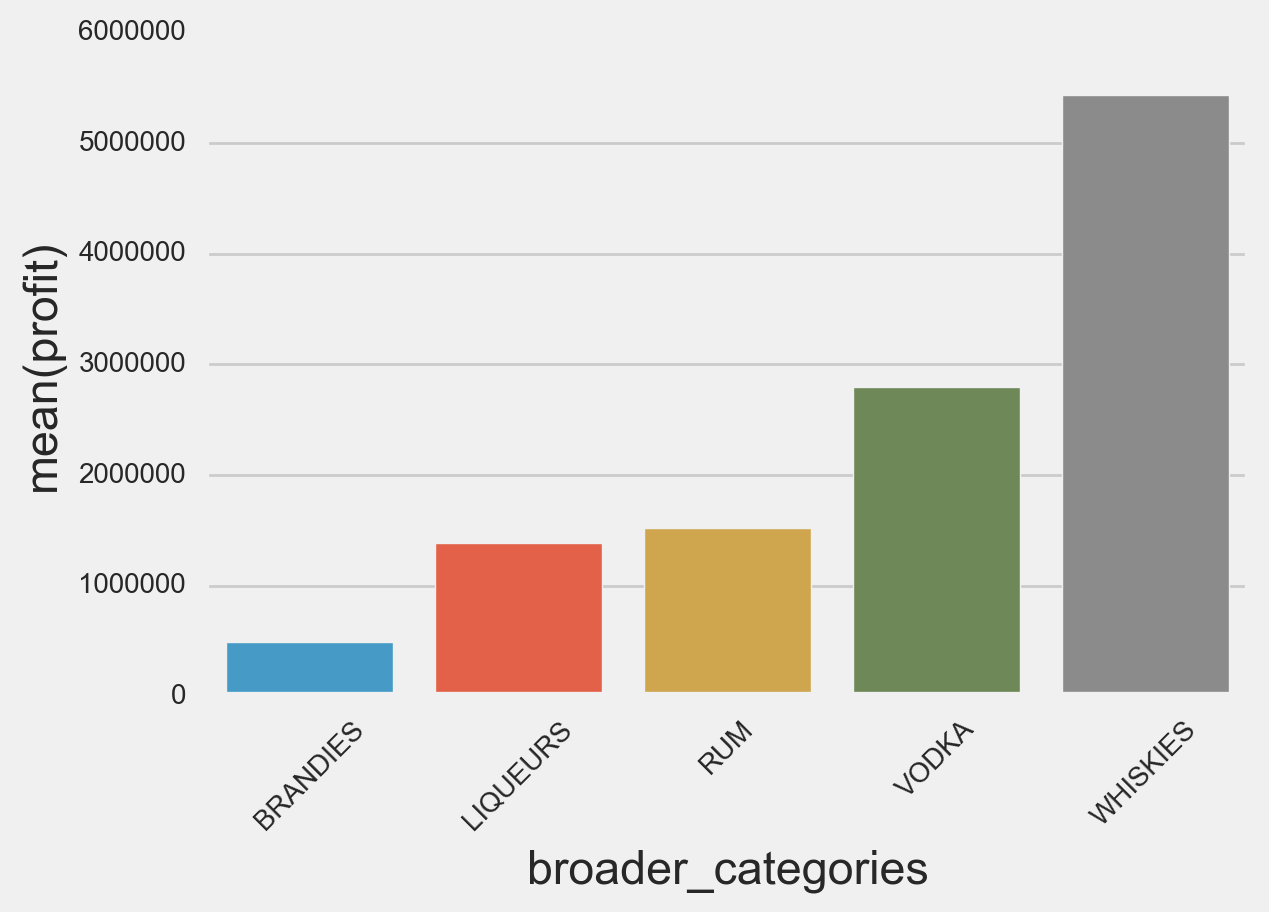

,broader_categories,profit
4,WHISKIES,5432007.60
3,VODKA,2796850.55
2,RUM,1522603.06
1,LIQUEURS,1389793.56
0,BRANDIES,492983.20


In [54]:
#Broader LIQUOR TYPE and PROFIT
# let's look at the relationship between LIQUOR TYPE and PROFIT 
#First, we need to compute the total profit in each broad category
profit_by_broader_categories = df.groupby('broader_categories', as_index = False).agg({'profit': 'sum'})
#Then we can plot a graph
x = profit_by_broader_categories['broader_categories']
y = profit_by_broader_categories['profit']
sns.barplot(x,y)
plt.xticks(rotation = 45)
plt.show()
profit_by_broader_categories.sort_values('profit', ascending = False)


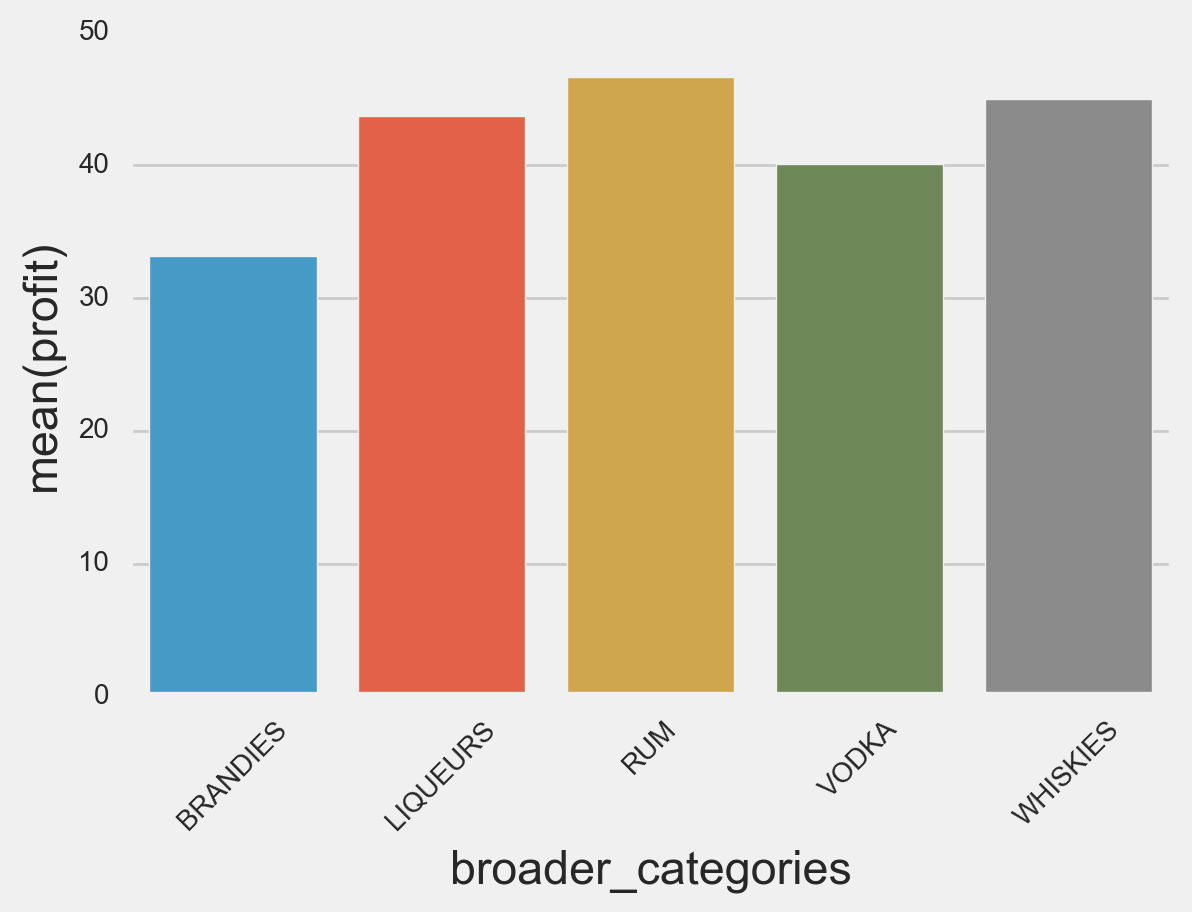

,broader_categories,profit
2,RUM,46.615530
4,WHISKIES,45.003833
1,LIQUEURS,43.727576
3,VODKA,40.072363
0,BRANDIES,33.132818


In [55]:
#Broader LIQUOR TYPE and PROFIT
# let's look at the relationship between LIQUOR TYPE and PROFIT 
#First, we need to compute the average profit in each broad category
profit_by_broader_categories = df.groupby('broader_categories', as_index = False).agg({'profit': 'mean'})
#Then we can plot a graph
x = profit_by_broader_categories['broader_categories']
y = profit_by_broader_categories['profit']
sns.barplot(x,y)
plt.xticks(rotation = 45)
plt.show()
profit_by_broader_categories.sort_values('profit', ascending = False)

In [ ]:
#Whiskies are ranked first in total profit but Rum has the highest average profit. 
#Brandies generated the lowest total profit and average profit.


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

# Liquor BRAND and SALES



In [71]:
#The liquor brand is given in the "Item description"
df['Item Description'].unique()

array(['Bacardi Superior Rum', 'Patron Tequila Silver',
       'Admiral Nelson Spiced Rum', ..., 'Five Star Pegasus',
       'Cedar Ridge Whiskey 3 Btl Gift Pack',
       'Cedar Ridge Single Malt Single Barrel Select'], dtype=object)

In [54]:
#In 2015
df2015 = df[(df.Year == 2015)]
profit_by_brand = df2015 .groupby(['Item Description'])['revenue'].sum()
profit_by_brand.sort_values(ascending=False).head(10)

Item Description
Black Velvet                     1278393.63
Jack Daniels Old #7 Black Lbl     978278.14
Captain Morgan Spiced Rum         958325.12
Fireball Cinnamon Whiskey         734351.90
Crown Royal Canadian Whisky       657268.92
Hawkeye Vodka                     571135.54
Absolut Swedish Vodka 80 Prf      552276.47
Grey Goose Vodka                  496630.22
Jagermeister Liqueur              392707.10
Bacardi Superior Rum              383554.92
Name: revenue, dtype: float64

In [57]:
#In 2016
df2016 = df[(df.Year == 2016)]
profit_by_brand = df2016 .groupby(['Item Description'])['revenue'].sum()
profit_by_brand.sort_values(ascending=False).head(10)

Item Description
Black Velvet                     286590.32
Jack Daniels Old #7 Black Lbl    206271.27
Captain Morgan Spiced Rum        203567.20
Fireball Cinnamon Whiskey        179000.88
Crown Royal Canadian Whisky      144682.07
Hawkeye Vodka                    131998.60
Absolut Swedish Vodka 80 Prf     125432.79
Grey Goose Vodka                 109936.78
Jameson                          109759.79
Titos Handmade Vodka              99092.91
Name: revenue, dtype: float64

In [ ]:
#Black Velvet, Jack Daniels and Captain Morgan Spiced Rum remain the top 3 best-selling liquor brands in 2015 and 2016

In [115]:
##Rename column "Item Number": "Brand"
df2016 = df2016.rename(columns={'Item Number': 'Brand'})
                             

# SCATTERPLOT

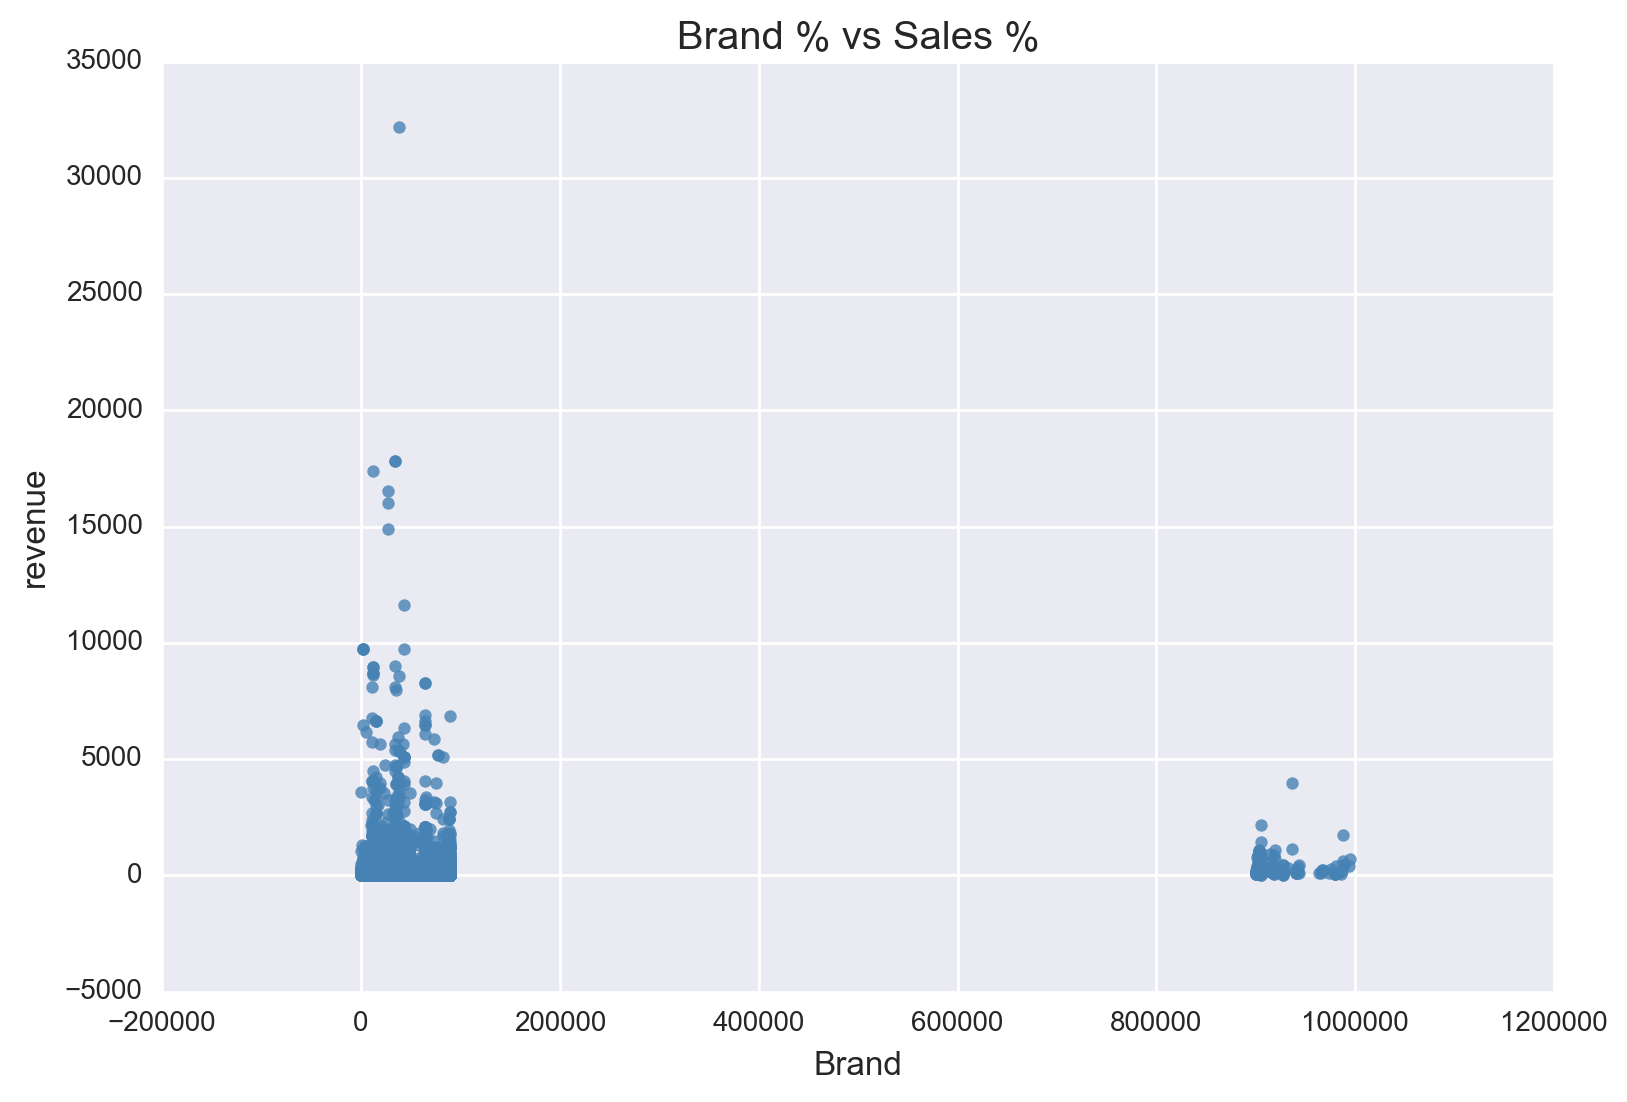

In [120]:
item=df2016.Brand
rev = df2016.revenue
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax = sns.regplot(item, rev, fit_reg=False, color='steelblue', ax=ax)
ax.set_title('Brand % vs Sales %')
plt.show()

# Liquor BRAND and PROFIT


In [64]:
#In 2015
df2015 = df[(df.Year == 2015)]
profit_by_brand = df2015 .groupby(['Item Description'])['profit'].sum()
profit_by_brand.sort_values(ascending=False).head(10)

Item Description
Black Velvet                     437329.12
Jack Daniels Old #7 Black Lbl    326156.32
Captain Morgan Spiced Rum        319557.62
Fireball Cinnamon Whiskey        244822.34
Crown Royal Canadian Whisky      219127.10
Hawkeye Vodka                    190554.00
Absolut Swedish Vodka 80 Prf     184183.25
Grey Goose Vodka                 165559.92
Jagermeister Liqueur             130930.59
Bacardi Superior Rum             128463.89
Name: profit, dtype: float64

In [65]:
#In 2016
df2016 = df[(df.Year == 2016)]
profit_by_brand = df2016 .groupby(['Item Description'])['profit'].sum()
profit_by_brand.sort_values(ascending=False).head(10)

Item Description
Black Velvet                     97648.32
Jack Daniels Old #7 Black Lbl    68772.00
Captain Morgan Spiced Rum        67879.20
Fireball Cinnamon Whiskey        59681.10
Crown Royal Canadian Whisky      48245.44
Hawkeye Vodka                    44032.88
Absolut Swedish Vodka 80 Prf     41831.50
Grey Goose Vodka                 36648.71
Jameson                          36600.03
Titos Handmade Vodka             33030.97
Name: profit, dtype: float64

In [ ]:
#Black Velvet, Jack Daniels and Captain Morgan Spiced Rum remain also generated the most profit in 2015 and 2016

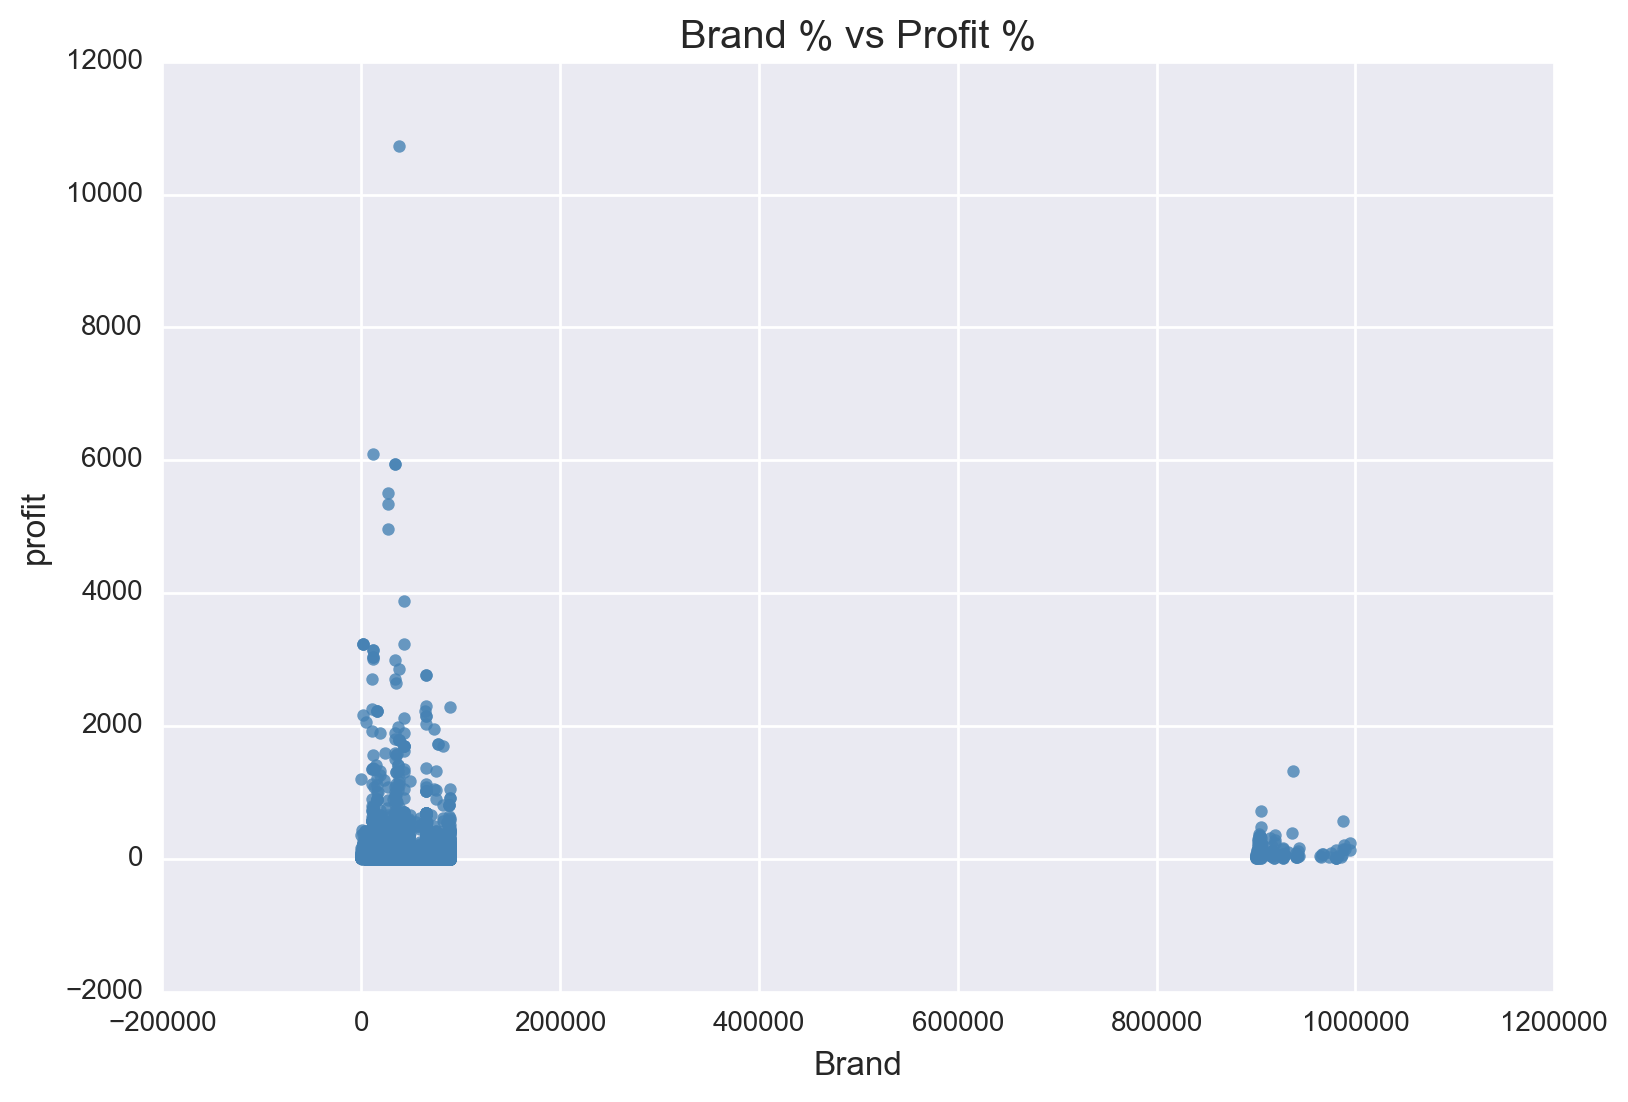

In [118]:
item=df2016.Brand
brand_profit = df2016.profit
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax = sns.regplot(item, brand_profit, fit_reg=False, color='steelblue', ax=ax)
ax.set_title('Brand % vs Profit %')
plt.show()

# CORRELATION MATRIX

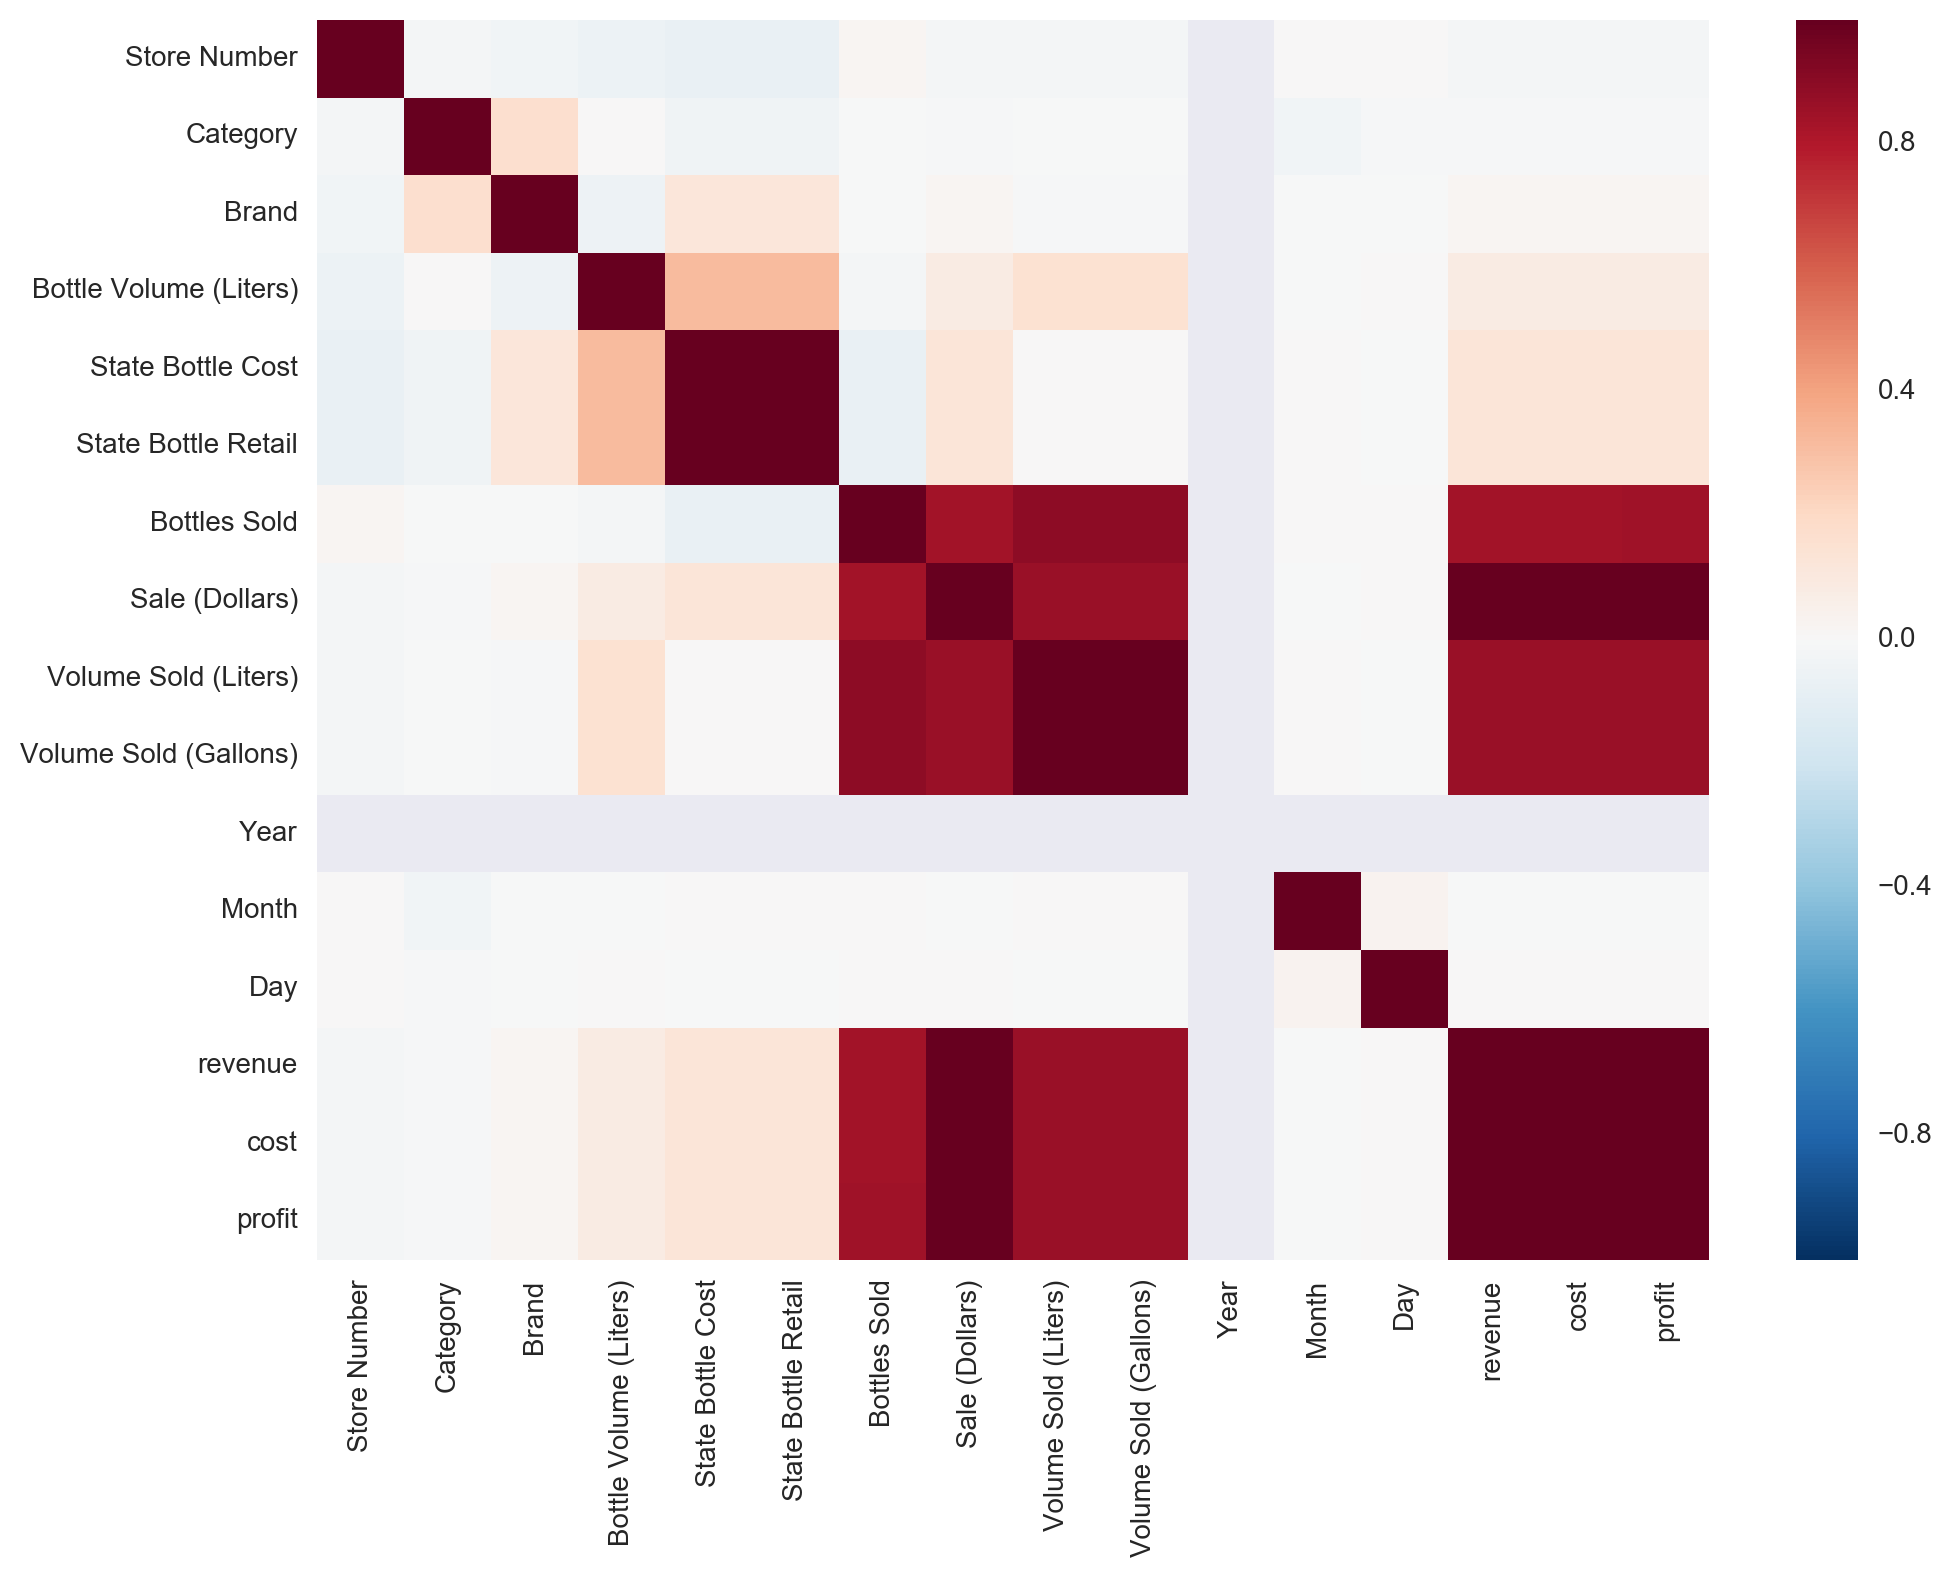

In [121]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df2016.corr(), ax=ax)
plt.show()

In [ ]:
#The scatterplots and the correlation matrix reveal no clear relationship between brand and sales/ brand and profit.

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [122]:
#We want to see what variables are highly correlated with store size (Volume Sold)
df.corr()

,Store Number,Category,Item Number,Bottle Volume (Liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month,Day,revenue,cost,profit
Store Number,1.000000,-0.012718,-0.026383,-0.062781,-0.071508,-0.071644,0.014792,-0.017671,-0.017313,-0.017303,0.020365,0.004882,-0.007857,-0.017671,-0.017697,-0.017613
Category,-0.012718,1.000000,0.115481,-0.009700,-0.012575,-0.012768,0.000110,0.007086,-0.004157,-0.004149,-0.016641,0.052548,-0.003496,0.007086,0.007269,0.006721
Item Number,-0.026383,0.115481,1.000000,-0.057668,0.095726,0.095458,-0.005063,0.002231,-0.010043,-0.010033,0.001068,-0.002586,-0.002836,0.002231,0.002409,0.001876
Bottle Volume (Liters),-0.062781,-0.009700,-0.057668,1.000000,0.312388,0.313369,-0.012117,0.082492,0.156272,0.156104,-0.002583,-0.002485,0.001329,0.082492,0.082265,0.082916
State Bottle Cost,-0.071508,-0.012575,0.095726,0.312388,1.000000,0.999960,-0.062816,0.135865,0.009281,0.009250,0.000930,0.011934,0.004114,0.135865,0.136384,0.134797
State Bottle Retail,-0.071644,-0.012768,0.095458,0.313369,0.999960,1.000000,-0.062668,0.136048,0.009722,0.009690,0.000566,0.012077,0.004132,0.136048,0.136546,0.135023
Bottles Sold,0.014792,0.000110,-0.005063,-0.012117,-0.062816,-0.062668,1.000000,0.826029,0.883975,0.884005,-0.006682,0.011284,-0.000859,0.826029,0.825095,0.827629
Sale (Dollars),-0.017671,0.007086,0.002231,0.082492,0.135865,0.136048,0.826029,1.000000,0.846461,0.846472,-0.008295,0.014577,-0.002177,1.000000,0.999949,0.999800
Volume Sold (Liters),-0.017313,-0.004157,-0.010043,0.156272,0.009281,0.009722,0.883975,0.846461,1.000000,1.000000,-0.007079,0.008539,-0.001337,0.846461,0.843936,0.851202
Volume Sold (Gallons),-0.017303,-0.004149,-0.010033,0.156104,0.009250,0.009690,0.884005,0.846472,1.000000,1.000000,-0.007078,0.008540,-0.001337,0.846472,0.843947,0.851214


In [ ]:
#The variables that is the most correlated with store size is profit.
#In other words,  a fair tax that affects larger stores more than smaller stores without explicitly taxing stores should 
#be based on profit per gallon.
#That way, the State Tax Board is only implicitly penalizing larger liquor stores as those stores will more likely 
#generate the largest profits per gallon.

# Exploratory Data Analysis



## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [22]:
##Q1 sales in 2015 & Q1 in 2016

q1_2015 = df[(df.Month > 1) & (df.Month <3) & (df.Year == 2015)] 
q1_2016 = df[(df.Month > 1) & (df.Month <3) & (df.Year == 2016)] 

#Q1 sales per county in 2015 & Q1 sales per county in in 2016

q1_county_2015 = q1_2015.groupby(['County'])[['Sale (Dollars)']].sum().reset_index()
q1_county_2016 = q1_2016.groupby(['County'])[['Sale (Dollars)']].sum().reset_index()

##Rename column "Q1_2015_Sales" and "Q1_2016_Sales" 
q1_county_2015 = q1_county_2015.rename(columns={'Sale (Dollars)': 'Q1_2015_Sales'})
q1_county_2016 = q1_county_2016.rename(columns={'Sale (Dollars)': 'Q1_2016_Sales'})


#Merge
county_quarterly_sales= q1_county_2015.merge( q1_county_2016,on='County')





In [23]:
#Counties with the highest sales in Q1_2015
county_quarterly_sales.sort_values(by='Q1_2015_Sales', ascending=False).head(5)


,County,Q1_2015_Sales,Q1_2016_Sales
75,Polk,419162.05,471862.54
55,Linn,185502.78,186699.52
80,Scott,138168.90,148899.16
6,Black Hawk,121687.57,111539.02
50,Johnson,109596.05,139348.66


In [ ]:
#Polk, Linn, Scott, Black Hawk and Johnson are the Iowa counties with  highest sales in Q1_2015

In [24]:
#Counties with the highest sakes in Q1_2016
county_quarterly_sales.sort_values(by='Q1_2016_Sales', ascending=False).head(5)

,County,Q1_2015_Sales,Q1_2016_Sales
75,Polk,419162.05,471862.54
55,Linn,185502.78,186699.52
80,Scott,138168.90,148899.16
50,Johnson,109596.05,139348.66
6,Black Hawk,121687.57,111539.02


In [ ]:
#Polk, Linn, Scott, Black Hawk and Johnson are still the Iowa counties with  highest sales in Q1_2016

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

# Sales Growth Rate 

In [44]:
#Growth of Sales between 2015 Q1 and 2016 Q1

county_quarterly_sales['change'] = county_quarterly_sales['Q1_2016_Sales'] - county_quarterly_sales['Q1_2015_Sales']
county_quarterly_sales['growth']=county_quarterly_sales['change']/county_quarterly_sales['Q1_2015_Sales']

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

# Iowa Counties with the Highest Sales Growth Rate 

In [45]:
#Top 5 counties with the highest growth of liquor sales between 2015 Q1 and 2016 Q1
county_quarterly_sales.sort_values(by='growth', ascending=False).head(5)

,County,Q1_2015_Sales,Q1_2016_Sales,change,growth
96,Worth,1111.01,7827.35,6716.34,6.045256
15,Cedar,3728.08,12372.56,8644.48,2.318749
11,Butler,1270.49,4165.39,2894.90,2.278570
23,Crawford,7498.69,24286.87,16788.18,2.238815
27,Delaware,4470.20,11959.69,7489.49,1.675426


In [ ]:
#While Polk has been the top county with the highest liquor revenue two years in a row, Worth county has generated the
#highest growth rate of liquor revenue(6% from 2015 to 2016) .

#While we cannot make a recommendation solely based on one metric analyzed over such short time period (one year), 
#I will inform the owner that Worth county presents a lot of potential according to my metric. However, Polk county
#seems a more promising location because it made the highest liquor profit during the same time period.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

# 1. Most profitable liquor

In [ ]:
#What would be the best type of liquor to sell to maximize profit

In [96]:
#Q1 2015
profit_by_liquor_type_15 = q1_2015.groupby('Category Name', as_index = False).agg({'profit': 'sum'})
profit_by_liquor_type_15.sort_values('profit', ascending = False).head(5)

,Category Name,profit
15,CANADIAN WHISKIES,119677.37
61,VODKA 80 PROOF,68858.45
53,SPICED RUM,52466.34
54,STRAIGHT BOURBON WHISKIES,42130.24
57,TENNESSEE WHISKIES,35481.40


In [97]:
#Q1 2016
profit_by_liquor_type_16 = q1_2016.groupby('Category Name', as_index = False).agg({'profit': 'sum'})
profit_by_liquor_type_16.sort_values('profit', ascending = False).head(5)

,Category Name,profit
15,CANADIAN WHISKIES,116568.35
61,VODKA 80 PROOF,85803.02
53,SPICED RUM,53230.50
64,WHISKEY LIQUEUR,49718.56
32,IMPORTED VODKA,46567.64


In [ ]:
#CANADIAN WHISKIES would be the best type of liquor to maximize profit.
#The second choice would be VODKA 80 PROOF

# 2. Best location if the owner is only selling one type of liquor

In [103]:
#Comparing Q1_2015 and Q2_2016 profits of each county by inventory type
#Let's find the Profit of each county by inventory type 

#Profit is equal to revenue minus cost
#The revenue by store is the product of State Bottle Retail & Bottles Sold
q1_2015['revenue'] = q1_2015['State Bottle Retail'] * q1_2015['Bottles Sold']


#The cost is the product of State Bottle Cost & Bottles Sold
q1_2015['cost'] = q1_2015['State Bottle Cost'] * q1_2015['Bottles Sold']

#The profit is the difference between revenue and cost
q1_2015['profit'] = q1_2015['revenue'] - q1_2015['cost']


#Sum profit by inventory type and county

county_inventory_2015=q1_2015.groupby([q1_2015['County'], q1_2015['Item Description']]).sum()["profit"].reset_index() 

##Let's sort the profit in descending order

top_county_inventory_2015=county_inventory_2015.sort_values(by='profit', ascending=False)

#Inventory Type of the top 10 counties with the highest profit

top_county_inventory_2015.head(10)




C:\Users\chris\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chris\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chris\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

,County,Item Description,profit
5950,Polk,Crown Royal Canadian Whisky,8152.13
3028,Henry,Black Velvet,6247.76
6552,Pottawattamie,Crown Royal Canadian Whisky,4943.04
5843,Polk,Black Velvet,4891.11
8024,Warren,Black Velvet,4624.50
3085,Howard,Black Velvet,4589.94
1920,Dallas,Jack Daniels Old #7 Black Lbl,4305.00
5904,Polk,Captain Morgan Spiced Rum,4192.62
614,Boone,Black Velvet,3696.96
6121,Polk,Jim Beam,3663.48


In [101]:
#Profit is equal to revenue minus cost
#The revenue by store is the product of State Bottle Retail & Bottles Sold
q1_2016['revenue'] = q1_2016['State Bottle Retail'] * q1_2016['Bottles Sold']


#The cost is the product of State Bottle Cost & Bottles Sold
q1_2016['cost'] = q1_2016['State Bottle Cost'] * q1_2016['Bottles Sold']

#The profit is the difference between revenue and cost
q1_2016['profit'] = q1_2016['revenue'] - q1_2016['cost']


#Sum profit by inventory type and county

county_inventory_2016=q1_2016.groupby([q1_2016['County'], q1_2016['Item Description']]).sum()["profit"].reset_index() 

##Let's sort the profit in descending order

top_county_inventory_2016=county_inventory_2016.sort_values(by='profit', ascending=False)

#Inventory Type of the top 10 counties with the highest profit

top_county_inventory_2016.head(10)




C:\Users\chris\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\chris\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chris\Anaconda2\envs\econ\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

,County,Item Description,profit
6274,Polk,Grey Goose Vodka,8416.93
6230,Polk,Fireball Cinnamon Whiskey,7552.47
1861,Crawford,Black Velvet,6638.10
8801,Woodbury,Jack Daniels Old #7 Black Lbl,5884.84
4494,Linn,Fireball Cinnamon Whiskey,4398.64
6015,Polk,Black Velvet,4173.34
3979,Johnson,Titos Handmade Vodka,4041.26
6133,Polk,Crown Royal Canadian Whisky,4021.72
8701,Woodbury,Black Velvet,3993.78
5024,Marion,Captain Morgan Spiced Barrel,3510.00


In [ ]:
#Polk would still be the best location even if the owner decides to sell only one type of liquor.

# FINAL REPORT

In [ ]:
#We used a dataset of the state of Iowa that contains transactions for all stores that have a class E liquor license.

#The goals of the project were to :1)Identify the best location for a new liquor store 2)Suggest the design of a tax that
#would affect larger stores more than smaller "mom and pop" stores

#We have started our analysis by visualizing our dataset and identifying the columns that needed to be cleaned. 

#Then we have performed an extensive data cleaning (fixing data types, removing unecessary signs and variables, replacing 
#missing values using a matching technique, and normalizing our variables to deal with outliers).

#Given that some stores have not operated the full year of 2015 and 2016, we have implemented 2 strategies to compare
#the performance of all the stores:
#Strategy 1: generate sales data per quarter 2 
#Strategy 2: compute the gross monthly revenue

#From there, we have been able to identify the highest and the lowest performing stores and counties 
#by using several financial metrics.

#Finally, we have suggested Polk county as the best location to open up a new liquor store given its financial performance 
#in 2015 and 2016. Our recommendation to the Iowa State Tax Board was to implement a tax based on profit per gallon. 
#Such tax would implicitly penalize larger liquor stores since those stores would more likely generate the largest
#profits per gallon.



